# Module 10: Unsupervised Learning
## Case Study – 3


In [4]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load and Explore the Dataset
data = pd.read_csv('zoo.csv')

# Check basic information
print("Dataset Info:")
print(data.info())
print("\nMissing Values Check:")
print(data.isnull().sum())

# Display the first 5 rows
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# 2.  Find out the unique number of high-level cclasses
# Check the unique high-level classes (class_type)
unique_classes = data['class_type'].nunique()
print(f"\nUnique High-Level Classes: {unique_classes}")

# Class distribution
class_counts = data['class_type'].value_counts()
print("\nClass Distribution:")
print(class_counts)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

Mis

In [5]:
# Step 2: Extract Intermediate Features and Target
# Removing non-numerical column 'animal_name' and keeping only the first 16 features
features = data.iloc[:, 1:17]  # Columns 1 to 16 are the intermediate features
target = data['class_type']   # The actual high-level class

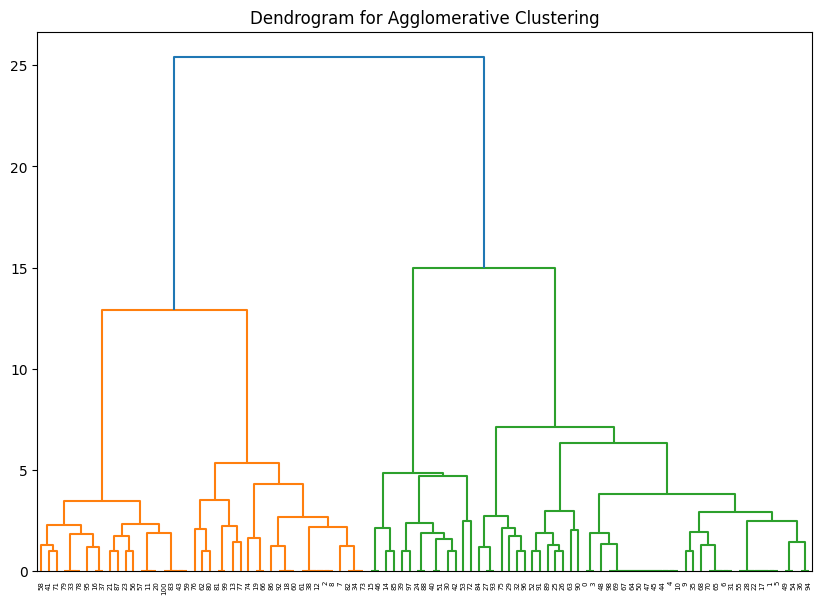

In [6]:
# Step 3: Perform Agglomerative Clustering
# Visualize the dendrogram to understand the clustering structure
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Agglomerative Clustering")
dendrogram = shc.dendrogram(shc.linkage(features, method='ward'))
plt.show()

In [10]:
# Perform Agglomerative Clustering
n_clusters = unique_classes  # Set number of clusters to the number of unique classes
cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
predicted_classes = cluster.fit_predict(features)

print(predicted_classes)

# Step 4: Compute Mean Squared Error
# Compare predicted cluster labels with actual class labels
mse = mean_squared_error(target, predicted_classes)
print(f"\nMean Squared Error between Actual and Predicted Classes: {mse}")

[1 1 2 1 1 1 1 2 2 1 1 3 2 6 0 0 3 1 2 2 3 3 1 3 0 5 5 4 1 4 0 1 4 3 2 1 1
 3 2 0 0 3 0 3 1 1 0 1 1 1 1 0 5 0 1 1 3 3 3 3 2 2 6 5 1 1 2 1 1 1 1 3 0 2
 2 4 6 6 3 3 6 6 2 3 4 0 2 3 0 5 5 5 2 4 1 3 4 0 1 6 3]

Mean Squared Error between Actual and Predicted Classes: 7.673267326732673


In [11]:
# Animals in Each Cluster:

# Add the predicted cluster labels to the original dataset
data['predicted_cluster'] = predicted_classes

# Group animals by their predicted cluster
clusters = data.groupby('predicted_cluster')['animal_name'].apply(list)

# Print the animals in each cluster
print("\nAnimals in Each Cluster:")
for cluster_id, animals in clusters.items():
    print(f"Cluster {cluster_id}: {animals}")



Animals in Each Cluster:
Cluster 0: ['crab', 'crayfish', 'flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'lobster', 'moth', 'octopus', 'scorpion', 'starfish', 'termite', 'wasp']
Cluster 1: ['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'elephant', 'giraffe', 'goat', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'polecat', 'pony', 'puma', 'pussycat', 'raccoon', 'reindeer', 'vole', 'wolf']
Cluster 2: ['bass', 'carp', 'catfish', 'chub', 'dogfish', 'dolphin', 'haddock', 'herring', 'pike', 'piranha', 'porpoise', 'seahorse', 'seal', 'sole', 'stingray', 'tuna']
Cluster 3: ['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk', 'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']
Cluster 4: ['fruitbat', 'girl', 'gorilla', 'sealion', 'squirrel', 'vampire', 'wallaby']
Cluster 5: ['frog', 'frog', 'newt', 'platypus', 'toad', '

In [14]:
# Analyze Features Driving the Clustering
# To identify the features that most likely influence the clustering:
#Calculate the mean values of features within each cluster.
#Compare these means to the overall dataset or other clusters to see distinguishing characteristics.

# Exclude non-numeric columns before calculating the mean
numeric_data = data.drop(columns=['animal_name', 'class_type'])  # Drop non-numeric columns

# Calculate the mean of each feature per cluster
cluster_features = numeric_data.groupby(data['predicted_cluster']).mean()

print("\nMean Values of Features per Cluster:")
print(cluster_features)

# Identify significant features for each cluster
print("\nKey Features Driving Each Cluster:")
for cluster_id, feature_means in cluster_features.iterrows():
    top_features = feature_means.sort_values(ascending=False).head(5)  # Top 5 features
    print(f"Cluster {cluster_id}:")
    for feature, value in top_features.items():
        print(f"  - {feature}: {value}")



Mean Values of Features per Cluster:
                       hair  feathers      eggs      milk  airborne   aquatic  \
predicted_cluster                                                               
0                  0.285714       0.0  0.928571  0.000000  0.428571  0.357143   
1                  1.000000       0.0  0.000000  1.000000  0.000000  0.033333   
2                  0.062500       0.0  0.812500  0.187500  0.000000  1.000000   
3                  0.000000       1.0  1.000000  0.000000  0.800000  0.300000   
4                  1.000000       0.0  0.000000  1.000000  0.285714  0.142857   
5                  0.142857       0.0  1.000000  0.142857  0.000000  0.714286   
6                  0.000000       0.0  0.857143  0.000000  0.000000  0.285714   

                   predator   toothed  backbone  breathes  venomous      fins  \
predicted_cluster                                                               
0                  0.500000  0.000000  0.000000  0.642857  0.214286  0